In [1166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1167]:
import warnings
warnings.filterwarnings('ignore')

In [1168]:
from IPython.display import Markdown, display
def customPrint(msg):
    display(Markdown(msg))

In [1169]:
pd.set_option("display.max.column", 30)

In [1170]:
loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1171]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [1172]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

No null value preset in dataset.

In [1173]:
#Duplicate value check
loan[loan.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Remove duplicate rows

In [1174]:
loan = loan[~loan.duplicated()]
loan.shape

(41176, 21)

In [1175]:
print(loan['response'].value_counts())
print(loan['response'].value_counts() / loan.index.size * 100 )

no     36537
yes     4639
Name: response, dtype: int64
no     88.733728
yes    11.266272
Name: response, dtype: float64


#Convert Yes & No value to 1 & 0 respectively
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})
print(loan['response'].value_counts())d
print(loan['response'].value_counts() / loan.index.size * 100 )

In [1176]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

## EDA

In [1177]:
#Get object type columns
objCol = loan.columns[loan.dtypes == 'object'] 
loan[objCol].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,response
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [1178]:
#Get non object type columns i.e int or float
numCol = loan.columns[loan.dtypes != 'object']
loan[numCol].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


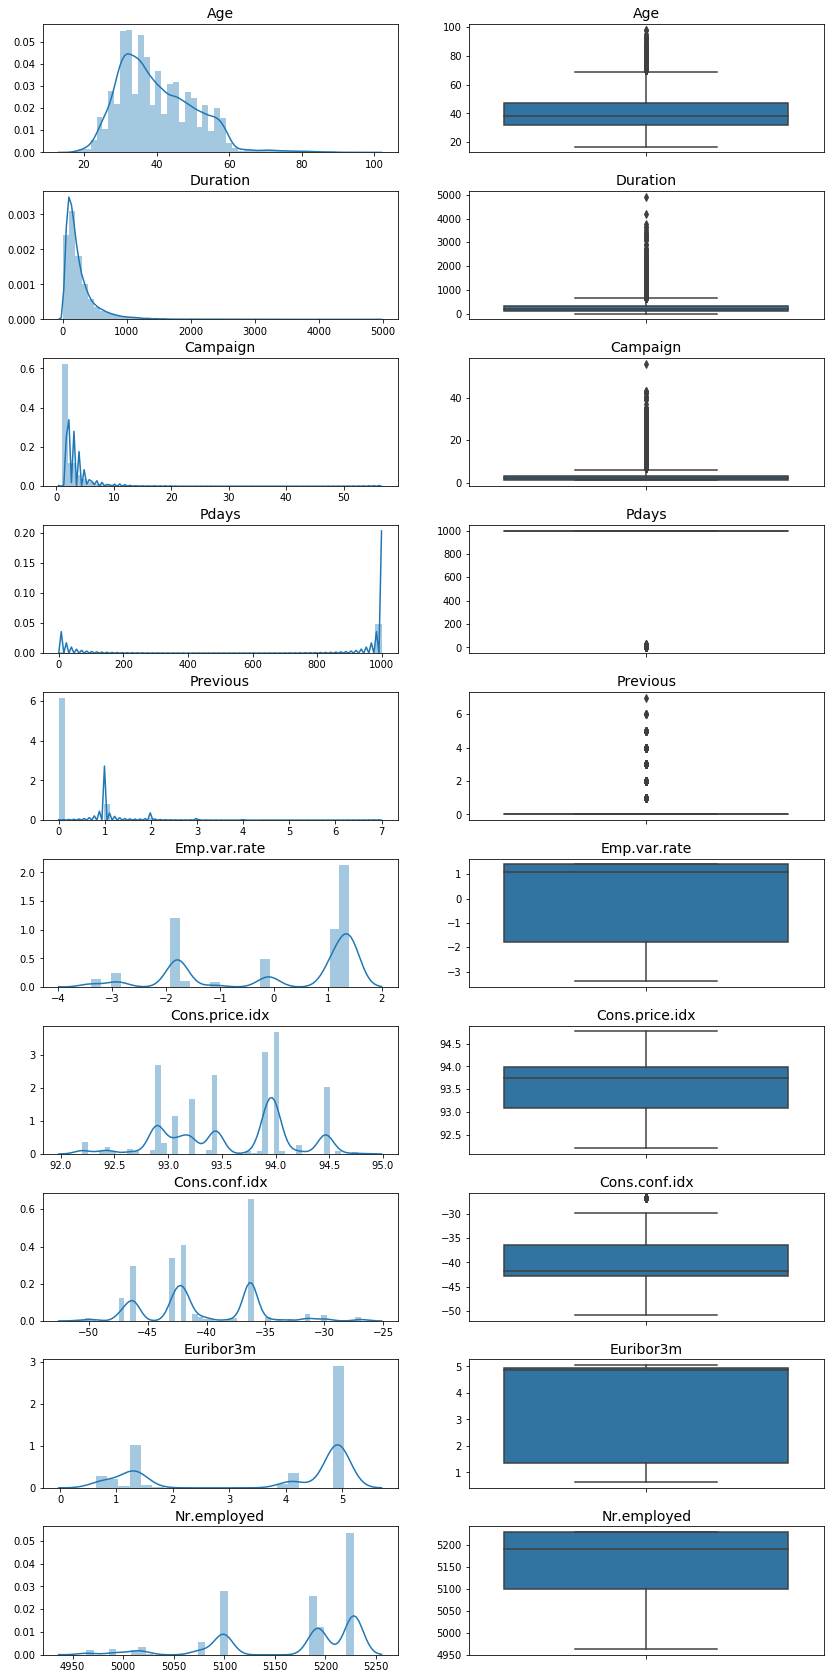

In [1179]:
#Plotting numerical variable
plt.figure(figsize=(14,30))
i = 0
for col in numCol:
    i = i+1
    ax1 = plt.subplot(numCol.size ,2,i)
    sns.distplot(loan[col], ax=ax1)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title(col.capitalize(), fontsize=14)
    
    i = i+1
    ax2 = plt.subplot(numCol.size ,2,i)
    ax2= sns.boxplot(data=loan, y=col, ax=ax2)
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title(col.capitalize(), fontsize=14)

plt.subplots_adjust(hspace=0.3)
plt.show()

There is an outlier in **Age, Duration, Campaign**.<BR>
Will remove oulier rows using 99 percentile value.

In [1180]:
loan[['age','duration','campaign']].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

,age,duration,campaign
count,41176.00000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879
std,10.42068,259.305321,2.770318
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
95%,58.00000,753.000000,7.000000
99%,71.00000,1271.250000,14.000000
max,98.00000,4918.000000,56.000000


In [1181]:
loan['age'][loan['age']>71] = 71
loan['duration'][loan['duration']>1271] = 1271
loan['campaign'][loan['campaign']>14] = 14

In [1182]:
def ResponseRatio(df, col, plotGraph=False, tickRotation= 0):
    No_of_prospect = df.groupby(col)['response'].count().reset_index(name = 'no_of_prospect')
    No_of_response = df[df['response']=="yes"].groupby(col)['response'].count().reset_index(name = 'no_of_response')
    tempDf = No_of_prospect.merge(No_of_response, how='left', on=col)
    tempDf['no_of_response'].fillna(0, inplace=True)
    tempDf['response_rate'] = round(100*(tempDf['no_of_response']/tempDf['no_of_prospect']), 2)
    
    if(plotGraph == True):
        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(121)
        sns.barplot(data=tempDf, x=col, y='response_rate', ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=tickRotation)
        ax1.set_xlabel("")
        ax1.set_title(col.capitalize(), fontsize=14)

        ax2 = fig.add_subplot(122)
        bbox=[0, 0, 1.5, 0.9]
        ax2.axis('off')

        mpl_table = ax2.table(cellText = tempDf.values, bbox=bbox, colLabels=tempDf.columns)
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(14)
        
        plt.show()
    else:
        return tempDf

### Perform Bivariate analysis<BR>
Compare response rate against each variable.

**Age**

In [1183]:
ageBins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], ageBins, include_lowest=True)

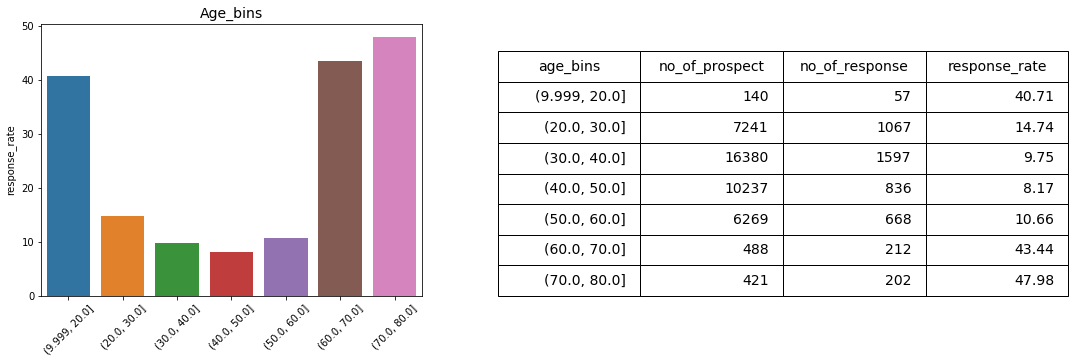

In [1184]:
ResponseRatio(loan, 'age_bins', True, 45)

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

**Job**

In [1185]:
loan['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

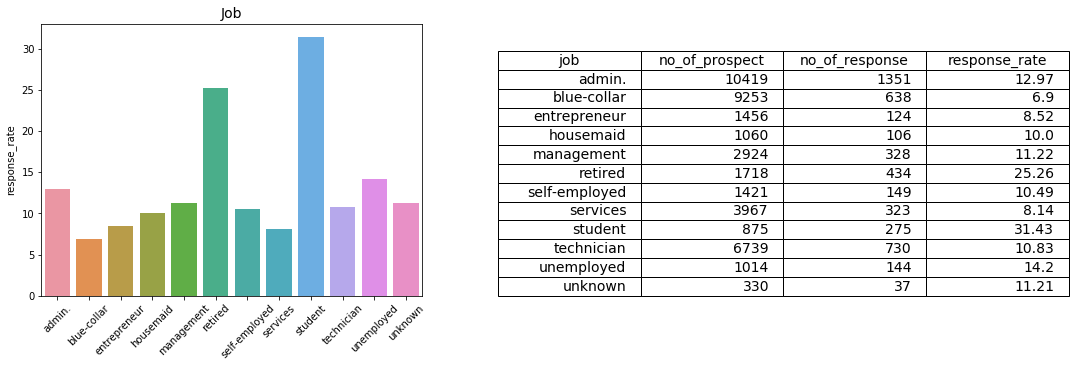

In [1186]:
ResponseRatio(loan, 'job', True, 45)

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

**Marital**

In [1187]:
loan['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [1188]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

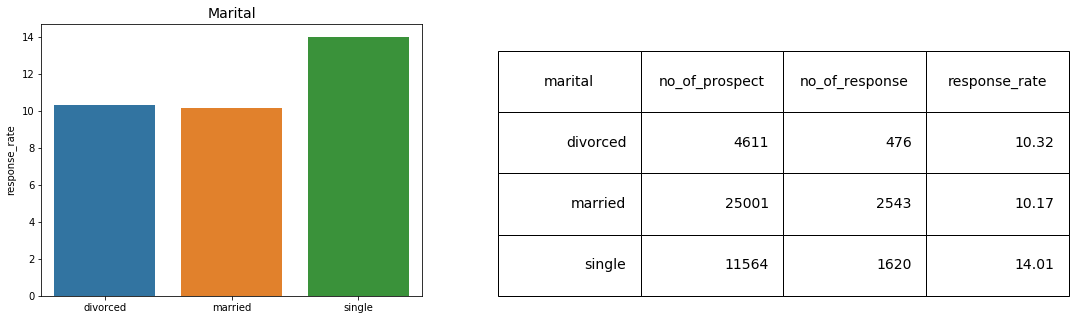

In [1189]:
ResponseRatio(loan, 'marital', True)

There is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

**Education**

In [1190]:
loan['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.


In [1191]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

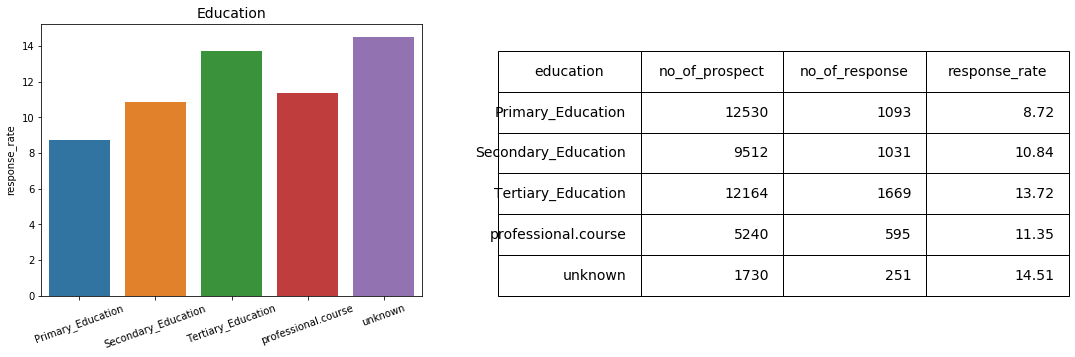

In [1192]:
ResponseRatio(loan, 'education', True, 20)

Response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

**Previous Default**

In [1193]:
loan['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

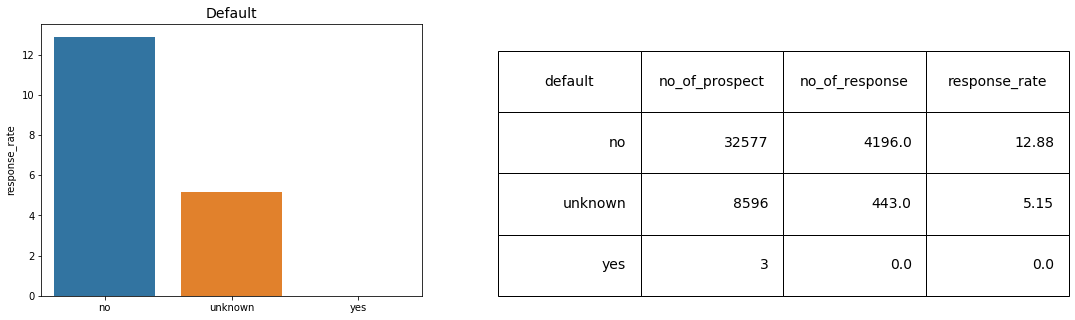

In [1194]:
ResponseRatio(loan, 'default', True)

**Housing**

In [1195]:
loan['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

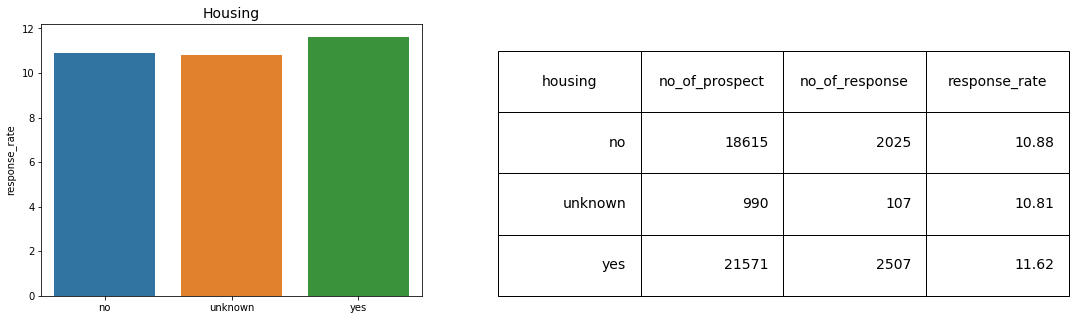

In [1196]:
ResponseRatio(loan, 'housing', True)

There is a slight uptick in the response rate for people with housing, though it is probably not very significant

**Loan**

In [1197]:
loan['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

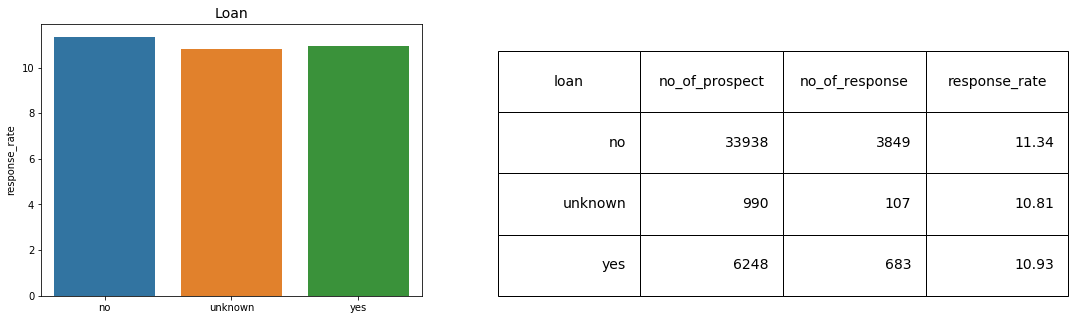

In [1198]:
ResponseRatio(loan, 'loan', True)

Now that we have had a look at the client data, we will move to the last contact information.

**Contact**

In [1199]:
loan['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

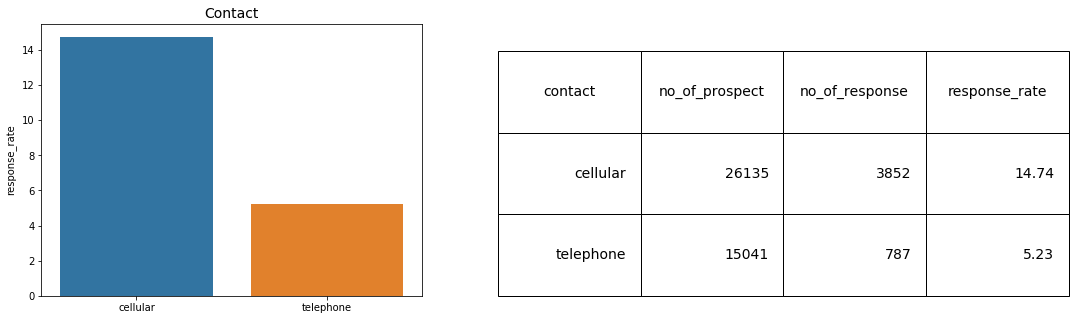

In [1200]:
ResponseRatio(loan, 'contact', True)

The prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

**Month**

In [1201]:
loan['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

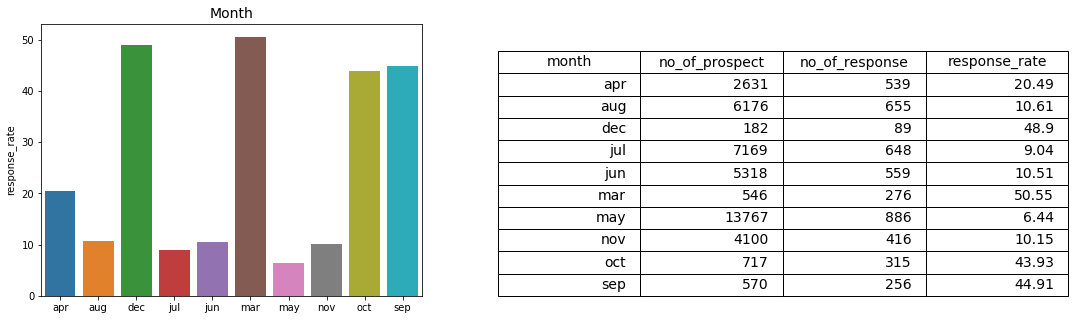

In [1202]:
ResponseRatio(loan, 'month', True)

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

**Day of the week**

In [1203]:
loan['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

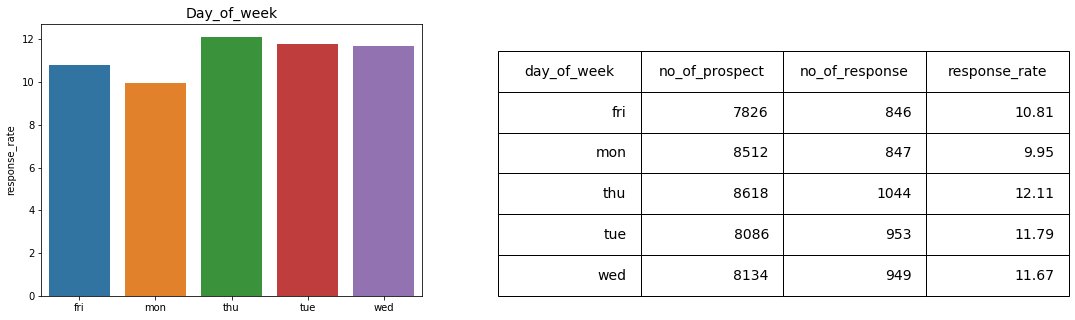

In [1204]:
ResponseRatio(loan, 'day_of_week', True)

Response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

**Campaign**

In [1205]:
loan['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
14      475
8       400
9       283
10      225
11      177
12      125
13       92
Name: campaign, dtype: int64

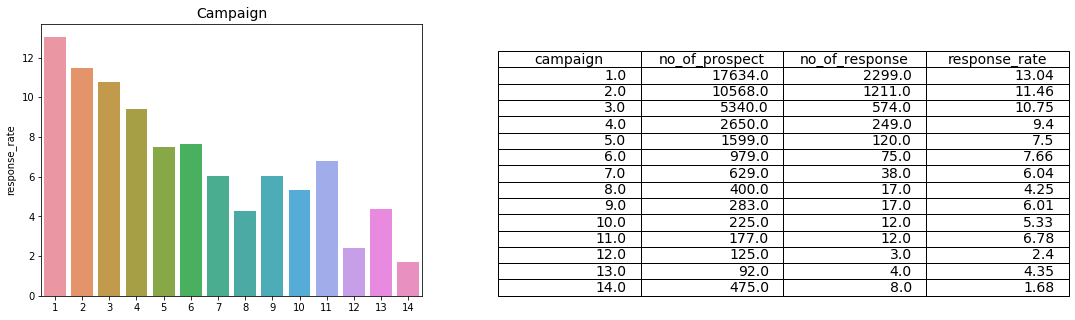

In [1206]:
ResponseRatio(loan, 'campaign', True)

The response rate gradually decreases as the number of campaign contacts increases.

**Gap after the last contact**

In [1207]:
loan['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [1208]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [1209]:
loan['pdays'].value_counts()

First_time_contacted         39661
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

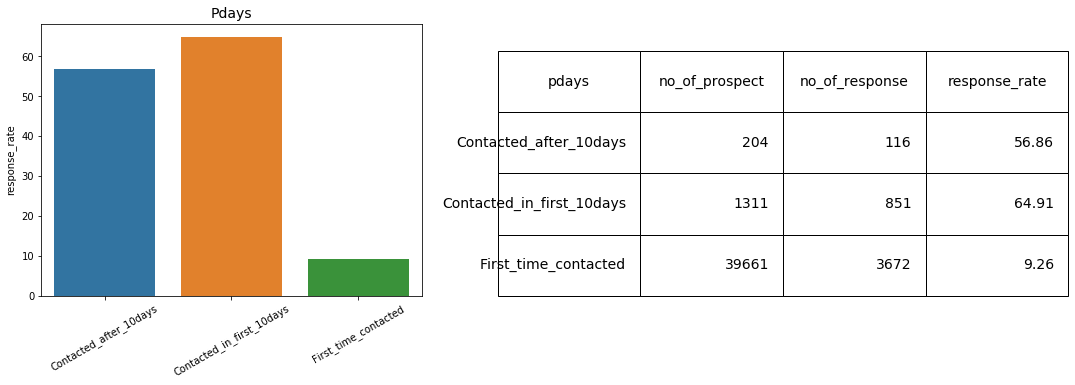

In [1210]:
ResponseRatio(loan, 'pdays', True, 30)

**Previous**

In [1211]:
loan['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [1212]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less than 3 times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than 3 times'

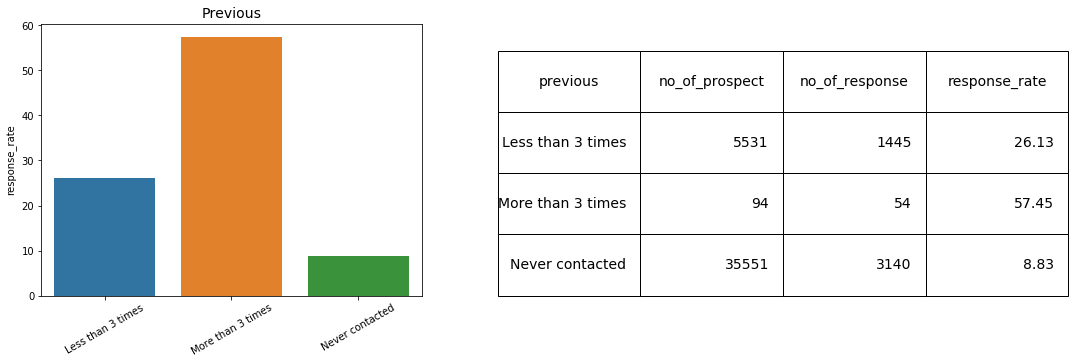

In [1213]:
ResponseRatio(loan, 'previous', True, 30)

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

**Employment Variation Rate¶**

In [1214]:
loan['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

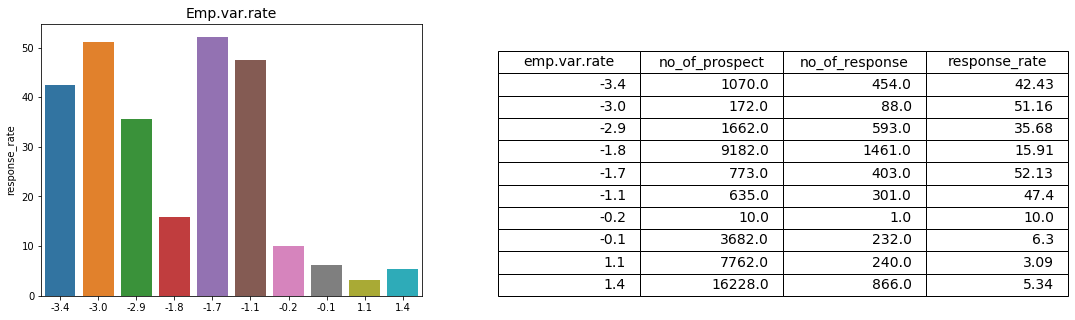

In [1215]:
ResponseRatio(loan, 'emp.var.rate', True)

Negative employment variation rate seems to be related to higher response rates.

**Consumer Price Index**

In [1216]:
loan['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

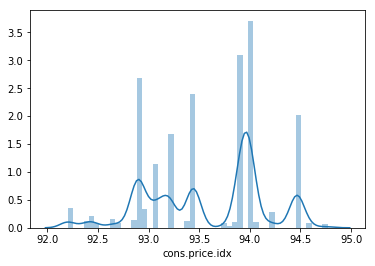

In [1217]:
sns.distplot(loan['cons.price.idx'])
plt.show()

**Euribor three month rate**

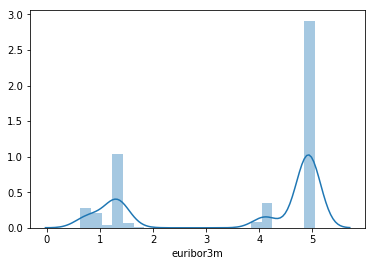

In [1218]:
#Rate eill have many values so will only plot distribution plot
sns.distplot(loan['euribor3m'])
plt.show()

**Number of employeees**

In [1219]:
loan['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

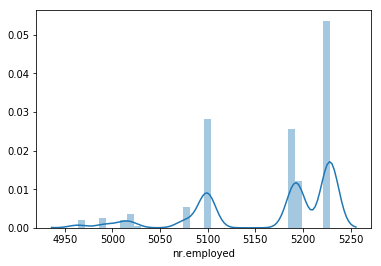

In [1220]:
sns.distplot(loan['nr.employed'])
plt.show()

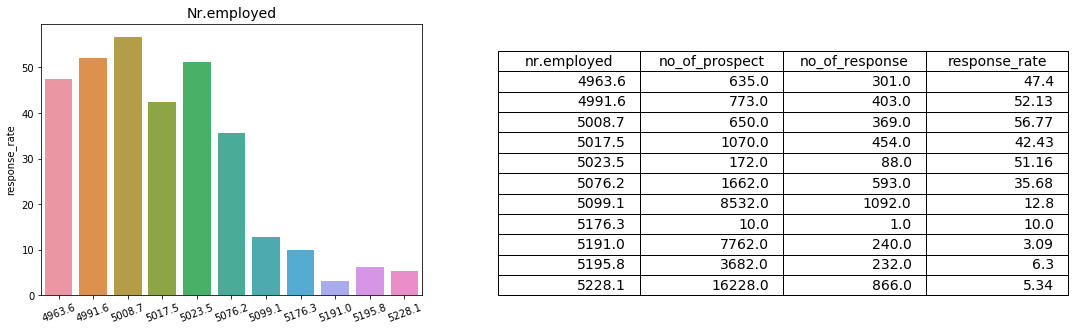

In [1221]:
ResponseRatio(loan, 'nr.employed', True,20)

## Data Prepration

In [1222]:
loan.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays               object
previous            object
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
response            object
age_bins          category
dtype: object

In [ ]:
#Drop age_bins which we craeted for analysis purpose only
#loan.drop(columns = 'age_bins', inplace = True)

### Create Dummy Variables for all Categorical variable

In [ ]:
# job
job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)
loan = pd.concat([loan,job],axis=1)

# marital
marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

# education
education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

# defalut
default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

# housing
housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

# loan
loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

# contact
contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

# month
month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

# day_of_week
day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

# pdays
pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

# previous
previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

# poutcome
poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [ ]:
loan.head()

In [ ]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

## Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
import statsmodels.api as sm
from sklearn.decomposition import PCA, IncrementalPCA

In [ ]:
loan.shape

In [ ]:
loan[loan[loan.columns.drop('duration')].duplicated()]

In [ ]:
loan = loan[~loan[loan.columns.drop('duration')].duplicated()]
loan.reset_index(inplace=True)

In [ ]:
#Add Prospect number for tracability
loan['prospect_id'] = np.arange(1, loan.index.size+1)
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [ ]:
# Putting feature variable to X
X = loan.drop(['response', 'duration', 'age_bins', 'prospect_id'],axis=1)

# Putting response variable to y
y = loan['response']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify = y )

In [ ]:
#Scale data using Standard Scaler
sc = StandardScaler()
cols = ['age','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [ ]:
X_train.head()

**Logistic Regression**

**Feature Selection**<BR>
Will use RFE (Recursive Feature Elimination) technique to select most important features from **17** different features.

In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=100)
lr.fit(X_train, y_train)

In [ ]:
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
dfRFE = pd.DataFrame(data=np.array([X_train.columns, rfe.support_, rfe.ranking_]).T, columns=['Feature', 'Support', 'Rank'])
dfRFE.sort_values(by='Rank')

In [ ]:
cols = list(dfRFE[dfRFE['Rank'] == 1]['Feature'])

In [ ]:
#Check correlation using Heatmap
corr = round(X_train[cols].corr().applymap(lambda x : 0 if x > -0.5 and x < 0.5 else x ), 1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

Few of the variables are highly correlated with each other.<Br>
Will drop such variable before building model.

In [ ]:
asd

In [ ]:
X_train.drop(labels=['pdays_Contacted_in_first_10days','emp.var.rate','previous_Never contacted'], inplace=True, axis=1)
cols.remove('pdays_Contacted_in_first_10days')
cols.remove('emp.var.rate')
cols.remove('previous_Never contacted')

Generic Method to get LR Model & VIF score

In [ ]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial(), ).fit()
    print(lr.summary())
    return (lr, X_train_lm)

In [ ]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    return vifScore

In [ ]:
#First Logistic regression Model
lr_1, train_lm_1 = GetLRModel(X_train[cols], y_train)

There are few insignificant features with high **P-value** is **default_yes, month_nov, month_jun**<BR>
Lets drop these features one by one and check updated P-value.

In [ ]:
#Model - 2
cols.remove("default_yes")
lr_2, train_lm_2 = GetLRModel(X_train[cols], y_train)

In [ ]:
#Model - 3
cols.remove("month_nov")
lr_3, train_lm_3 = GetLRModel(X_train[cols], y_train)

In [ ]:
#Model - 4
cols.remove("month_jun")
lr_4, train_lm_4 = GetLRModel(X_train[cols], y_train)

In [ ]:
#Model - 5
cols.remove("loan_unknown")
lr_5, train_lm_5 = GetLRModel(X_train[cols], y_train)

In [ ]:
#Now P-value of all features looks good.
#Check for multicollinearity using VIF score
GetVIFScore(X_train[cols])

In [ ]:
#Model - 6
cols.remove("pdays_First_time_contacted")
lr_6, train_lm_6 = GetLRModel(X_train[cols], y_train)

**P-Value** of all variable are significant as well as **VIF Score** also low. 

In [ ]:
def EvaluateModel(lr_model, lr_model_data, y_actual, threshold, display = False, isGLM = True):
    if isGLM == True:
        pred = lr_model.predict(lr_model_data)
    else:
        pred = lr_model.predict_proba(lr_model_data)[:,1]
        
    pred = pred.values if isinstance(pred, pd.Series) == True else pred
    
    pred_df = pd.DataFrame(data= {'Responded' : y_actual.values, 'Response_Prob':pred.reshape(-1)})

    pred_df['Response_Prob'] = round(pred_df['Response_Prob'] * 100,2)
    pred_df['Prediction'] = pred_df['Response_Prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    pred_df = pred_df.sort_values(by='Response_Prob', ascending=False)
    accuracy = round(metrics.accuracy_score(pred_df['Responded'], pred_df['Prediction'] ), 2)
    sensitivity, specificity, _ = sensitivity_specificity_support(pred_df['Responded'], pred_df['Prediction'], average='binary' )
    sensitivity = round(sensitivity, 2)
    specificity = round(specificity, 2)
    auc = round(metrics.roc_auc_score(pred_df['Responded'], pred_df['Prediction'] ), 2)
    if display:
        print("********* " , threshold, " ***********")
        print("Accuracy : ", accuracy)
        print("Sensitivity : ", sensitivity)
        print("Specificity : ", specificity)
        print("ROC - AUC : ", auc)
    else:
        return (accuracy, sensitivity, specificity, auc, pred_df)

Identify threshold value using final GLM model.

In [ ]:
modelPerf_lr6 = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr_6, train_lm_6, y_train, i)
    modelPerf_lr6.loc[i] = [i, accuracy, sensitivity, specificity, auc]

In [ ]:
modelPerf_lr6.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr6

Lets build Logistic regression model using features identified using GLM model.

In [ ]:
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

In [ ]:
lr = LogisticRegression(class_weight="balanced", random_state=1)
param = {'C' : [0.001,0.01,0.1,1,10,100]}
model_cv = GridSearchCV(lr, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
model_cv.fit(X_train[cols], y_train)

In [ ]:
lrScore = pd.DataFrame(model_cv.cv_results_)
lrScore[['param_C','mean_test_score','mean_train_score']]

In [ ]:
model_cv.best_params_

In [ ]:
#Build Logistic regression model using hyperparameter value C = 0.01
lr = LogisticRegression(class_weight="balanced", C=10, random_state=1)
lr.fit(X_train[cols], y_train)

In [ ]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr, X_train[cols], y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, sensitivity, specificity, auc]

In [ ]:
modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

Check for the threshold value between 30 & 50. 

In [ ]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(30, 51, 1):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr, X_train[cols], y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, sensitivity, specificity, auc]

In [ ]:
modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

**We are getting highest AUC, Accuracy, Sencitivity & Specificity at threshold value 41 (i.e. probability 0.41).**<BR>
So final model should use threshold as 41 for prediction.


But as per business object we should achive 80% of responders with minimum cost.<BR>
To target 80% reponders we should choose our **threshold value less than 35**.<BR>
At threshold value **34** we are getting **80% of True Positive Rate / Sensitivity**, as well as have **57% of True Negative Rate / Specificity**. 

In [ ]:
#Evaluate model on Train & test Data using threshold value = 36
print("Evaluate Training Data Score")
EvaluateModel(lr, X_train[cols],y_train, 34, display=True, isGLM=False)

print()
print("Evaluate Test Data Score")
EvaluateModel(lr, X_test[cols],y_test, 34, display=True, isGLM=False)


**We are getting almost similar result on both data set, which means our predication model was neither underfitted nor overfitted on traing data.**

Lets predict probability for complete data set including Train & Test data

In [ ]:
c = ['age','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X[c] = sc.transform(X[c])

In [ ]:
accuracy, sensitivity, specificity, auc, df_pred = EvaluateModel(lr, X[cols],y, 37, isGLM=False)
print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("ROC - AUC : ", auc)

In [ ]:
df_pred.head()

In [ ]:
df_pred = pd.concat([df_pred, loan['prospect_id']], axis=1)

In [ ]:
df_pred.head()

Wereas as per defined business problem our Repon

In [ ]:
loan['du']